In [1]:
%%bash
git clone https://github.com/benihime91/leaf-disease-classification-kaggle.git
cd /kaggle/working/leaf-disease-classification-kaggle/
pip install --upgrade -r requirements.txt
wandb login a74f67fd5fae293e301ea8b6710ee0241f595a63

  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=a9dec5198adb3d8534d5bb489c4e4a2d02c00339f6ce247f9940c13af85c9b2a
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime
  Attempting uninstall: wandb
    Found existing installation: wandb 0.10.12
    Uninstalling wandb-0.10.12:
      Successfully uninstalled wandb-0.10.12
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


Cloning into 'leaf-disease-classification-kaggle'...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datashader 0.11.1 requires numba!=0.49.*,!=0.50.*,>=0.37.0, but you have numba 0.49.1 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [2]:
import sys
sys.path.append('/kaggle/working/leaf-disease-classification-kaggle/')

In [3]:
# run lr-finder
!python leaf-disease-classification-kaggle/run_lrfinder.py --config-name 02-01-20-effnet3 \
optimizer=adam scheduler=sgdr augmentations=light-augs mixmethod=default batch_size=32 loss=bi-tempered-logistic-loss network=transferlearning

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b3_ns-9d44bf68.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b3_ns-9d44bf68.pth
[2021-01-12 04:55:30,685][src.lightning.core][INFO] - Loss Function : BiTemperedLogisticLoss()
GPU available: True, used: True
[2021-01-12 04:55:31,704][lightning][INFO] - GPU available: True, used: True
TPU available: False, using: 0 TPU cores
[2021-01-12 04:55:31,705][lightning][INFO] - TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[2021-01-12 04:55:31,705][lightning][INFO] - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using native 16bit precision.
[2021-01-12 04:55:31,705][lightning][INFO] - Using native 16bit precision.
[2021-01-12 04:55:31,875][src.lightning.core][INFO] - DATA: /kaggle/input/cassava-leaf-disease-classification/train_images/
[2021-01-12 04:55:31,875][src.lightning.core][INFO] - FOLD: 0  BATCH_SIZE: 32
[2021-01-12 04:55:31,888][num

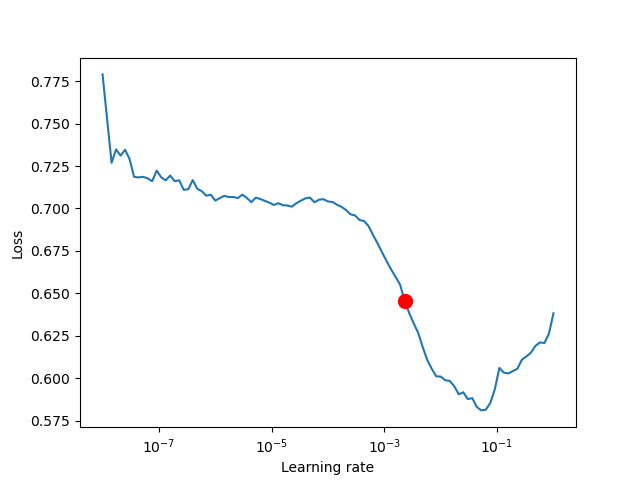

In [4]:
# view lr_finder results
from IPython.display import Image
Image('models/lr-finder-plot.png')

In [5]:
!python leaf-disease-classification-kaggle/hydra_run.py --config-name 02-01-20-effnet3 \
optimizer=adam scheduler=sgdr augmentations=light-augs mixmethod=default batch_size=32 loss=bi-tempered-logistic-loss network=transferlearning num_epochs=10 curr_fold=0 learning_rate=1e-03

[2021-01-12 04:58:51,739][src.lightning.core][INFO] - Loss Function : BiTemperedLogisticLoss()
GPU available: True, used: True
[2021-01-12 04:58:52,711][lightning][INFO] - GPU available: True, used: True
TPU available: False, using: 0 TPU cores
[2021-01-12 04:58:52,711][lightning][INFO] - TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
[2021-01-12 04:58:52,711][lightning][INFO] - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Using native 16bit precision.
[2021-01-12 04:58:52,712][lightning][INFO] - Using native 16bit precision.
[2021-01-12 04:58:52,723][src.lightning.core][INFO] - DATA: /kaggle/input/cassava-leaf-disease-classification/train_images/
[2021-01-12 04:58:52,723][src.lightning.core][INFO] - FOLD: 0  BATCH_SIZE: 32
[2021-01-12 04:58:52,728][numexpr.utils][INFO] - NumExpr defaulting to 2 threads.
[2021-01-12 04:58:54,194][src.lightning.core][INFO] - Optimizer: Adam  LR's: (1e-05, 0.001)
[2021-01-12 04:58:54,195][src.lightning.core][INFO] - LR Sc